# This is a test code to try multivariate input and multivariate output time series problem. MLP model with dense input and output layers has been used in it.

In [30]:
# import os
# os.environ['CUDA_VISIBLE_DEVICES'] = '5,6'
import os
os.environ["CUDA_VISIBLE_DEVICES"]="5,6"
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [31]:
# Using seaborn for pairplot.
!pip install -q seaborn
!pip install -q tensorflow

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

print(tf.__version__)

2.14.0


In [59]:
# Define columns to use
columns_to_use = ["global_x", "global_y", "v_class", "global_time"] #using just 4 of them

# Define chunk size for reading data
chunk_size = 100

# Initialize an empty list to store data chunks
data_chunks = []

for chunk in pd.read_csv("https://data.transportation.gov/resource/8ect-6jqj.csv", 
                         chunksize=chunk_size, usecols=columns_to_use):
    data_chunks.append(chunk)

# Concatenate data chunks into a single DataFrame
trajectory_dataset = pd.concat(data_chunks, ignore_index=True)

# trajectory_dataset = pd.read_csv(
#     "https://data.transportation.gov/resource/8ect-6jqj.csv")

#   names=["Vehicle_ID", "Frame_Id", "Total_Frames", "Global_Time", "Local_X",
#            "Local_Y", "Global_X", "Global_Y", "v_length", "v_Width", "v_Vel", 
#            "v_Acc", "Lane_ID", "O_Zone", "D_Zone", "Int_ID", "Section_ID", "Direction",
#            "Movement", "Preceding", "Following", "Space_Headway", "Time_Headway", "Location"]

In [60]:
trajectory_dataset.shape

(1000, 4)

array([[<Axes: title={'center': 'global_time'}>,
        <Axes: title={'center': 'global_x'}>],
       [<Axes: title={'center': 'global_y'}>,
        <Axes: title={'center': 'v_class'}>]], dtype=object)

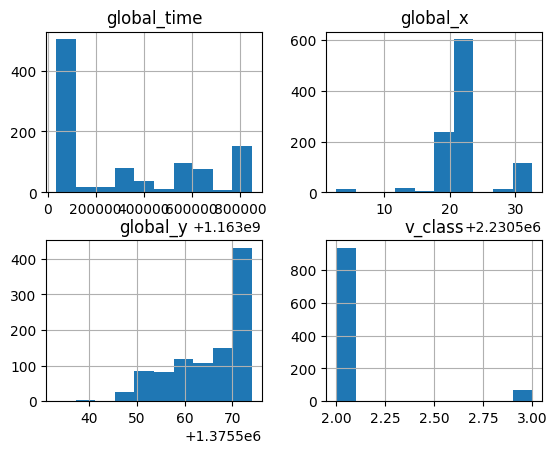

In [61]:
trajectory_dataset.hist()

In [36]:
t_dataset = trajectory_dataset.copy()
t_dataset.tail()

,global_time,global_x,global_y,v_class
995,1163074800,2230522.629,1375574.155,2
996,1163074100,2230522.629,1375574.155,2
997,1163054800,2230522.629,1375574.155,2
998,1163054300,2230522.629,1375574.155,2
999,1163071000,2230522.629,1375574.155,2


In [37]:
# Define input features and labels (trying an alternate method: using train_test_split form sklearn)
input_features = ["global_x", "global_y", "v_class", "global_time"]
output_labels = ["global_x", "global_y"]

# Split dataset into input features and labels
X = t_dataset[input_features]
y = t_dataset[output_labels]

# Split the dataset into training and test sets (80-20 split)
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of training and test sets
print("Train Features Shape:", train_features.shape)
print("Train Labels Shape:", train_labels.shape)
print("Test Features Shape:", test_features.shape)
print("Test Labels Shape:", test_labels.shape)

Train Features Shape: (800, 4)
Train Labels Shape: (800, 2)
Test Features Shape: (200, 4)
Test Labels Shape: (200, 2)


In [38]:
t_dataset.isna().sum()

global_time    0
global_x       0
global_y       0
v_class        0
dtype: int64

In [39]:
train_labels_x = train_labels['global_x']
train_labels_y = train_labels['global_y']

test_labels_x = test_labels['global_x']
test_labels_y = test_labels['global_y']

In [40]:
train_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
global_x,800.0,2.230522e+06,4.214597,2.230503e+06,2.230520e+06,2.230522e+06,2.230522e+06,2.230533e+06
global_y,800.0,1.375565e+06,8.054386,1.375533e+06,1.375558e+06,1.375568e+06,1.375572e+06,1.375574e+06
v_class,800.0,2.067500e+00,0.251043,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00
global_time,800.0,1.163317e+09,301726.623994,1.163035e+09,1.163050e+09,1.163110e+09,1.163582e+09,1.163850e+09


In [41]:
train_labels.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
global_x,800.0,2.230522e+06,4.214597,2230502.731,2.230520e+06,2230521.572,2230522.475,2230532.603
global_y,800.0,1.375565e+06,8.054386,1375532.938,1.375558e+06,1375567.959,1375572.436,1375574.155


In [42]:
# train_dataset = t_dataset.sample(frac=0.80, random_state=0)
# test_dataset = t_dataset.drop(train_dataset.index)

In [43]:
# train_dataset.describe().transpose()

In [44]:
# # Creating copies of the datasets
# train_features = train_dataset.copy()
# test_features = test_dataset.copy()
# train_features.head() # checking the features

In [45]:
# train_labels_x = train_features.pop('global_x')
# train_labels_y = train_features.pop('global_y')

# test_labels_x = test_features.pop('global_x')
# test_labels_y = test_features.pop('global_y')

# print(train_labels_x.head())  # Checking the labels for global_x
# print(train_labels_y.head())  # Checking the labels for global_y

In [46]:
# normalizer = tf.keras.layers.Normalization(axis=-1)
# normalizer.adapt(np.array(train_features))
# print(normalizer.mean.numpy())

In [47]:
input_normalizer = tf.keras.layers.Normalization(axis=-1)
input_normalizer.adapt(np.array(train_features))
print(input_normalizer.mean.numpy())

[[2.231e+06 1.376e+06 2.067e+00 1.163e+09]]


In [48]:
train_features_normalized = input_normalizer(np.array(train_features)).numpy()

test_features_normalized = input_normalizer(np.array(test_features)).numpy()

In [49]:
# first = np.array(train_features[:1])

# with np.printoptions(precision=2, suppress=True):
#   print('First example:', first)
#   print()
#   print('Normalized:', normalizer(first).numpy())

In [50]:
#normailizing the output layer
output_normalizer=layers.Normalization(axis=-1)
output_normalizer.adapt(train_labels)
print(output_normalizer.mean.numpy())

# # Checking the nomalized output layer
# second = np.array(train_labels[:1])
# print(output_normalizer(second).numpy())

[[2230521.2 1375565.4]]


In [51]:
train_labels_normalized = output_normalizer(np.array(train_labels)).numpy()

test_labels_normalized = output_normalizer(np.array(test_labels)).numpy()

In [52]:
# # Normalize the output labels (global_x and global_y), OPTIONAL
# g_x = np.array(train_labels_x)
# g_x_normalizer = layers.Normalization(axis=-1)
# g_x_normalizer.adapt(g_x)

# g_y = np.array(train_labels_y)
# g_y_normalizer = layers.Normalization(axis=-1)
# g_y_normalizer.adapt(g_y)

In [53]:
def build_and_compile_model(norm_input):
  multi_output_model = keras.Sequential([
      norm_input,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),

      #norm_output,  # Add normalization layer for output labels
      layers.Dense(2)
  ])

  multi_output_model.compile(loss={'global_x': 'mean_absolute_error', 'global_y': 'mean_absolute_error'},
                           optimizer=tf.keras.optimizers.Adam(0.001),
                           metrics={'global_x': 'accuracy', 'global_y': 'accuracy'})

  return multi_output_model

In [54]:
dnn_model = build_and_compile_model(input_normalizer)
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 4)                 9         
 on)                                                             
                                                                 
 dense_11 (Dense)            (None, 64)                320       
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                      

In [56]:
# %%time
# history = dnn_model.fit(train_features,
#                          {'global_x': train_labels_x, 'global_y': train_labels_y},
#                          validation_split=0.2,
#                          epochs=100,
#                          verbose=0)

In [57]:
%%time
history = dnn_model.fit(
    train_features_normalized,
    train_labels_normalized,
    validation_split=0.2,
    verbose=0, epochs=100)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1127, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1185, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 252, in __call__
        self.build(y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 193, in build
        self._losses = self._conform_to_outputs(y_pred, self._losses)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 63, in _conform_to_outputs
        struct = map_to_output_names(outputs, self._output_names, struct)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 819, in map_to_output_names
        raise ValueError(

    ValueError: Found unexpected losses or metrics that do not correspond to any Model output: dict_keys(['global_x', 'global_y']). Valid mode output names: ['dense_21']. Received struct is: {'global_x': 'mean_absolute_error', 'global_y': 'mean_absolute_error'}.


In [ ]:
test_results = multi_output_model.evaluate(test_features, {'output_x': test_labels_x, 'output_y': test_labels_y}, verbose=0)

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 3000000])
  plt.xlabel('Epoch')
  plt.ylabel('Error [global_x]')
  plt.legend()
  plt.grid(True)